In [2]:
!pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 18.5 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 28.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [1]:
from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)




In [3]:
# dataset path
path ="F:/cyclegan/Dataset/images/"
#path="D:/cyclegan/Dataset/images/" #for lab

In [4]:
# load dataset A -ct scan
dataA_all = load_images(path + 'trainA/')
print('Loaded dataA: ', dataA_all.shape)

Loaded dataA:  (1742, 256, 256, 3)


In [5]:
# load dataset B - Photos 
dataB_all = load_images(path + 'trainB/')
print('Loaded dataB: ', dataB_all.shape)

Loaded dataB:  (1744, 256, 256, 3)


In [6]:
# Shuffle and align the datasets
num_samples = min(len(dataA_all), len(dataB_all))
indices = np.random.permutation(num_samples)

trainA_data = dataA_all[indices]
trainB_data = dataB_all[indices]

In [7]:
# Confirm dataset shapes
print("Train A shape:", trainA_data.shape)
print("Train B shape:", trainB_data.shape)

Train A shape: (1742, 256, 256, 3)
Train B shape: (1742, 256, 256, 3)


In [13]:
!pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 39.4 MB/s eta 0:00:00
     ---------------------------------------- 302.2/302.2 kB ? eta 0:00:00


In [8]:
from sklearn.utils import resample
#To get a subset of all images, for faster training during demonstration
dataA = resample(trainA_data, 
                 replace=False,     
                 n_samples=500,    
                 random_state=42) 

dataB = resample(trainB_data, 
                 replace=False,     
                 n_samples=500,    
                 random_state=42) 

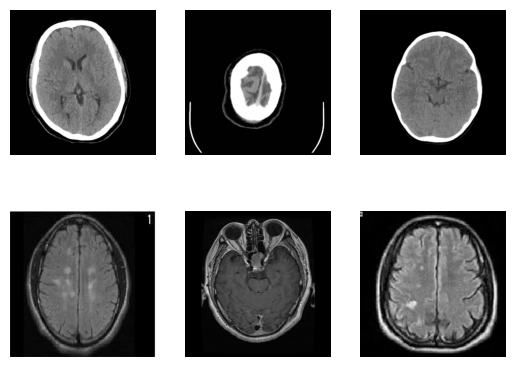

In [9]:
# plot source images
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(dataB[i].astype('uint8'))
plt.show()

In [10]:
# load image data
data = [dataA, dataB]

print('Loaded', data[0].shape, data[1].shape)

Loaded (500, 256, 256, 3) (500, 256, 256, 3)


In [11]:
#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)

In [20]:
!pip install nbformat


     ---------------------------------------- 77.6/77.6 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 83.4/83.4 kB ? eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB ? eta 0:00:00
     ------------------------------------- 180.7/180.7 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


In [12]:
# Load the functions from the cyclegan_model.ipynb file
%run cyclegan_model.ipynb

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\anamika jha\appdata\local\temp\pip-req-build-3nzn_1u8


  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Anamika Jha\AppData\Local\Temp\pip-req-build-3nzn_1u8'
  fatal: unable to access 'https://www.github.com/keras-team/keras-contrib.git/': Could not resolve host: www.github.com
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Anamika Jha\AppData\Local\Temp\pip-req-build-3nzn_1u8' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Anamika Jha\AppData\Local\Temp\pip-req-build-3nzn_1u8' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pi

In [13]:


# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)




c:\Users\Anamika Jha\anaconda3\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
c:\Users\Anamika Jha\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
from datetime import datetime
start1 = datetime.now() 
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset, epochs=5)

stop1 = datetime.now()
# Execution time of the model 
execution_time = stop1 - start1
print("Execution time is: ", execution_time)

1/1 [==============================] - 2s 2s/step
Iteration>1, dA[1.878,1.088] dB[0.857,1.233] g[21.963,24.367]
1/1 [==============================] - 1s 769ms/step


KeyboardInterrupt: 

In [14]:
# Use the saved cyclegan models for image translation
from keras_contrib.layers import InstanceNormalization 
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

In [15]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X


In [16]:
# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()
	

In [17]:
from sklearn.utils import resample
# load dataset
A_data = resample(dataA_all, 
                 replace=True,     
                 n_samples=50,    
                 random_state=42) # reproducible results

B_data = resample(dataB_all, 
                 replace=True,     
                 n_samples=50,    
                 random_state=42) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5

In [18]:
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('F:/cyclegan/g_model_AtoB_050000.h5' , cust)
model_BtoA = load_model('F:/cyclegan/g_model_BtoA_050000.h5', cust)

#for lab 
#model_AtoB = load_model('D:/cyclegan/g_model_AtoB_050000.h5' , cust)
#model_BtoA = load_model('D:/cyclegan/g_model_BtoA_050000.h5', cust)


1/1 [==============================] - 3s 3s/step


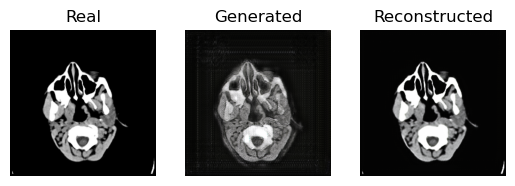

1/1 [==============================] - 2s 2s/step


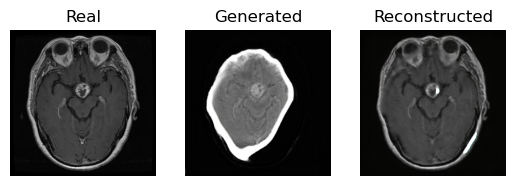

In [19]:
# plot A->B->A (ct to mri to ct)
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B (mri to ct to mri)
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

Testing the datset and evalauation

In [20]:
# Import necessary modules
from numpy import asarray
from numpy import vstack
from keras_contrib.layers import InstanceNormalization
from keras.models import load_model
from matplotlib import pyplot as plt
from numpy.random import randint


# Load Test A (CT scan) and Test B (MRI) datasets
testA_data = load_images('F:/cyclegan/Dataset/images/testA/')
testB_data = load_images('F:/cyclegan/Dataset/images/testB/')

#testA_data = load_images('D:/cyclegan/Dataset/images/testA/')
#testB_data = load_images('D:/cyclegan/Dataset/images/testB/')

# Preprocess the test datasets
testA_data = (testA_data - 127.5) / 127.5
testB_data = (testB_data - 127.5) / 127.5


For 1 image from dataset 

In [21]:
test1="F:/cyclegan/Dataset/images/testB/mri8.jpg"# real mri image


In [22]:
def test_model(test_image_path):
    #Load a single custom image
    test_image = load_img(test_image_path, target_size=(256,256))
    test_image = img_to_array(test_image)
    test_image_input = np.array([test_image])  # Convert single image to a batch.
    test_image_input = (test_image_input - 127.5) / 127.5
    
    # plot B->A->B (mri to ct to mri)
    ct_generated  = model_BtoA.predict(test_image_input)#mri-ct
    mri_reconstructed = model_AtoB.predict(ct_generated)
    show_plot(test_image_input, ct_generated, mri_reconstructed)

1/1 [==============================] - 1s 1s/step


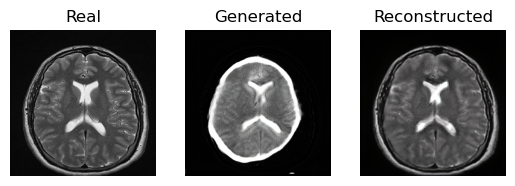

In [23]:
test_model(test1)

In [24]:
import numpy as np
from numpy import cov, trace
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from PIL import Image
from skimage.transform import resize



In [25]:
testA= "F:/cyclegan/Dataset/images/testA/ct8.png"

In [27]:
from sklearn.metrics import mean_squared_error

# Load the real CT scan image
testA = Image.open("F:/cyclegan/Dataset/images/testA/ct8.png").convert("RGB")
testA = testA.resize((256, 256))
testA = img_to_array(testA)
testA_input = np.array([testA])
testA_input = (testA_input - 127.5) / 127.5

# Generate the CT scan image using the model
ct_generated = model_BtoA.predict(testA_input)

1/1 [==============================] - 1s 1s/step


MSE

In [28]:

# Calculate the Mean Squared Error
mse = np.mean(np.square(testA_input - ct_generated))
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0053193015


MAE

In [29]:
# Calculate the Mean Absolute Error
mae = np.mean(np.abs(testA_input - ct_generated))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.03537486


PSNR

In [30]:

import math
# Calculate PSNR
MAX = 255
psnr = 20 * math.log10(MAX) - 10 * math.log10(mse)
print("PSNR:", psnr)

PSNR: 70.87225753496917


SSIM

In [97]:
from skimage.metrics import structural_similarity as compare_ssim

# Load the real CT scan image
testA = Image.open("D:/cyclegan/Dataset/images/testA/ct8.png").convert("RGB")
testA = testA.resize((256, 256))
testA = img_to_array(testA)
testA_input = np.array([testA])
testA_input = (testA_input - 127.5) / 127.5

# Generate the CT scan image using the model
ct_generated = model_BtoA.predict(testA_input)

# Resize ct_generated to the same dimensions as testA
ct_generated_resized = resize(ct_generated[0], (256, 256, 3))

# Calculate SSIM
ssim_score = compare_ssim(testA, ct_generated_resized, multichannel=True)

print("SSIM Score:", ssim_score)



1/1 [==============================] - 1s 1s/step


ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

Use model on all test dataset

In [27]:
# Load the saved generator models
cust = {'InstanceNormalization': InstanceNormalization}
#model_AtoB = load_model('F:/cyclegan/g_model_AtoB_050000.h5', cust)
#model_BtoA = load_model('F:/cyclegan/g_model_BtoA_050000.h5', cust)


model_AtoB = load_model('D:/cyclegan/g_model_AtoB_050000.h5', cust)
model_BtoA = load_model('D:/cyclegan/g_model_BtoA_050000.h5', cust)


In [28]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Select a random sample of images from the test dataset
def select_sample(dataset, n_samples):
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    return X

# Generate translated CT scan images from MRI images
batch_size = 100
num_batches = len(testB_data) // batch_size

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size
    
    batch_testB_data = testB_data[start_idx:end_idx]
    translated_ct_scans = model_BtoA.predict(batch_testB_data)  # mri-ct

4/4 [==============================] - 132s 28s/step


In [ ]:
output_dir = 'F:/cyclegan/test2-image'
os.makedirs(output_dir, exist_ok=True)

for i in range(batch_size):
        plt.subplot(1, 2, 1)
        plt.axis('off')
        plt.imshow((batch_testB_data[i] + 1) / 2.0)
        plt.title('MRI')

        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.imshow((translated_ct_scans[i] + 1) / 2.0)
        plt.title('Translated CT')
        
        plt.savefig(os.path.join(output_dir, f'Batch_{batch_idx}_MRI_to_CT_{i}.png'))
        plt.close()

print('Visualizations saved to:', output_dir)

Visualizations saved to: F:/cyclegan/test2-image


In [50]:
# Save after every 100 samples for MRI to CT translation
output_dir = 'D:/cyclegan/test-images'
os.makedirs(output_dir, exist_ok=True)

for i in range(0, len(testB_data), 50):
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.imshow((testB_data[i] + 1) / 2.0)
    plt.title('MRI')

    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow((translated_ct_scans[i] + 1) / 2.0)
    plt.title('Translated CT')
    
    plt.savefig(os.path.join(output_dir, f'MRI_to_CT_{i}.png'))
    plt.close()

print('Visualizations saved to:', output_dir)


Visualizations saved to: D:/cyclegan/test-images


Evaluation metrics

In [54]:
from sklearn.metrics import mean_squared_error

# Assuming testA_data_flat has 744 images and translated_ct_scans_flat has 100 images
# Randomly select 100 images from translated_ct_scans_flat
selected_indices_translated = np.random.choice(translated_ct_scans.shape[0], size=100, replace=False)
selected_translated_ct_scans_flat = translated_ct_scans[selected_indices_translated]

# Randomly select 100 images from testA_data_flat
selected_indices_testA = np.random.choice(testA_data.shape[0], size=100, replace=False)
selected_testA_data_flat = testA_data[selected_indices_testA]

# Reshape the selected images to 2D arrays
selected_translated_ct_scans_flat_2d = selected_translated_ct_scans_flat.reshape(selected_translated_ct_scans_flat.shape[0], -1)
selected_testA_data_flat_2d = selected_testA_data_flat.reshape(selected_testA_data_flat.shape[0], -1)

# Calculate the MSE between the selected CT scan images and the selected translated CT scan images
mse_ct_to_generated_ct = mean_squared_error(selected_testA_data_flat_2d, selected_translated_ct_scans_flat_2d)
print(f"MSE for CT to generated CT translation: {mse_ct_to_generated_ct}")


MSE for CT to generated CT translation: 0.4343458116054535


In [41]:
!pip install scikit-image


  Using cached scikit_image-0.21.0-cp310-cp310-win_amd64.whl (22.8 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached imageio-2.31.1-py3-none-any.whl (313 kB)
     -------------------------------------- 221.0/221.0 kB 6.8 MB/s eta 0:00:00
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)


In [32]:
import numpy as np

from skimage.metrics import peak_signal_noise_ratio

In [55]:
from skimage.metrics import peak_signal_noise_ratio

# Calculate PSNR between selected_testA_data_flat and selected_translated_ct_scans_flat
psnr_ct_to_generated_ct = np.mean([peak_signal_noise_ratio(selected_testA_data_flat[i].reshape(256, 256, 3),
                                                           selected_translated_ct_scans_flat[i].reshape(256, 256, 3))
                                   for i in range(len(selected_testA_data_flat))])
print(f"PSNR for CT to generated CT translation: {psnr_ct_to_generated_ct:.4f}")


PSNR for CT to generated CT translation: 9.7342


FID

In [29]:
import numpy as np
from numpy import cov, trace
from numpy.linalg import svd
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization



In [ ]:
# Resize images to the expected input shape of InceptionV3
resized_testA_data = []
for img in testA_data:
    resized_img = resize(img, (299, 299, 3))
    resized_testA_data.append(resized_img)
testA_data = np.array(resized_testA_data)

# Resize translated CT scan images to the expected input shape of InceptionV3
resized_translated_ct_scans = []
for img in translated_ct_scans:
    resized_img = resize(img, (299, 299, 3))
    resized_translated_ct_scans.append(resized_img)
translated_ct_scans = np.array(resized_translated_ct_scans)

In [35]:
print("Shape of testA_data:", testA_data.shape)
print("Shape of translated_ct_scans:", translated_ct_scans.shape)


Shape of testA_data: (744, 299, 299, 3)
Shape of translated_ct_scans: (100, 299, 299, 3)


In [43]:
# Function to load and preprocess images
def load_images(path):
    # Load images
    image_files = sorted(os.listdir(path))
    images = [plt.imread(os.path.join(path, file)) for file in image_files]
    images = np.array(images)
    return images

# Function to calculate FID
# Function to calculate FID
def calculate_fid(model, translated_ct_scans, testA_data):
    # Calculate activations
    act1 = model.predict(translated_ct_scans)
    act2 = model.predict(testB_data)
    
    # Calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    
    # Calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    
    # Calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    
    # Check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    # Calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid



In [49]:
# Prepare the InceptionV3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Calculate FID between the first 10 translated CT scans and the first 10 real CT scans
fid = calculate_fid(model, translated_ct_scans, testA_data)
print('FID between the translated CT scans and the real CT scans: %.3f' % fid)


24/24 [==============================] - 24s 979ms/step
FID between the first 10 translated CT scans and the first 10 real CT scans: 206.506
